### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Input Dataset

Reference https://archive.ics.uci.edu/dataset/186/wine+quality
    
Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. 

The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).

Input variables (based on physicochemical tests):

- fixed acidity

- volatile acidity

- citric acid

- residual sugar

- chlorides

- free sulfur dioxide

- total sulfur dioxide

- density

- pH

- sulphates

- alcohol

Output variable (based on sensory data): 

 - quality (score between 0 and 10)

In [2]:
rw = pd.read_csv('/kaggle/input/dataset-wine/winequality-red.csv')
ww = pd.read_csv('/kaggle/input/dataset-wine/winequality-white.csv')


In [3]:
rw.head(20)

# add information about whine type
rw["class"] = 1
# rw.shape

In [4]:
rw.info()
print('----------------------------------------------------')
print('targets: ',rw['quality'].unique())
print('----------------------------------------------------')
rw.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  class                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB
----------------------------------------------------
targets:  [5 6 7 4 8 3

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [5]:
# add information about whine type
ww["class"] = 0

ww.info()
print('----------------------------------------------------')
print('targets: ',ww['quality'].unique())
print('----------------------------------------------------')
rw.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  class                 4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB
----------------------------------------------------
targets:  [6 5 7 8 4 3

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

#### create single table with red and white wine

In [6]:
df=pd.concat([rw, ww], axis=0)
df.head(20)
print('1. ----------------------------------------------------')
df.info()
print('2. ----------------------------------------------------')
print('targets: ',df['quality'].unique())
print('3. ----------------------------------------------------')
df.isnull().sum()
print('4. ----------------------------------------------------')
df.isna().sum()

1. ----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
2. ---------------------

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

- dataset do not contain 0 or nan
- there is no categorical data that need to ba converted into numerical data

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [8]:
print(df.shape)
print(df.duplicated().sum())

(6497, 13)
1177


- duplicates need to be removed

In [9]:
df.drop_duplicates(subset = None, keep='first', inplace=True, ignore_index=False)
df.shape

(5320, 13)

In [10]:
df['quality'].value_counts()

quality
6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: count, dtype: int64

- we can see that data in target are not equaly distributed. It can have inmpact on the machine learning if dataset is not balanced. 
- we can apply weights using following equation: wj=n_samples / (n_classes * n_samplesj)
- we can also apply weights based on the whine color: 1 (for red wine)  and 0 (for white wine)
- we can changing targets into "low", "medium" and "high" to get more balanced data

##### let is group some categories to get more balanced data

In [11]:
df['quality2'] = df['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df['quality2'] = pd.Categorical(df['quality2'], categories=['low', 'medium', 'high'])
print(df['quality2'].value_counts())
df.head(10)

quality2
medium    3179
low       1988
high       153
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,low
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1,low
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,medium
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,medium
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1,low
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,1,low


In [12]:
df['quality3'] = df['quality'].apply(lambda value: ('low' if value <= 5 else 'high') )
df['quality3'] = pd.Categorical(df['quality3'], categories=['low', 'high'])

df['quality3_num'] = df['quality'].apply(lambda value: (0 if value <= 5 else 1) )
df['quality3_num'] = pd.Categorical(df['quality3_num'], categories=[0, 1])

print(df['quality3'].value_counts())
print(df['quality3_num'].value_counts())
df.head(10)

quality3
high    3332
low     1988
Name: count, dtype: int64
quality3_num
1    3332
0    1988
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,quality2,quality3,quality3_num
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,low,low,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,low,low,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,low,low,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,medium,high,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,low,low,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1,low,low,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,medium,high,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,medium,high,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1,low,low,0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,1,low,low,0


#### pairplot

In [13]:
features=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','class']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


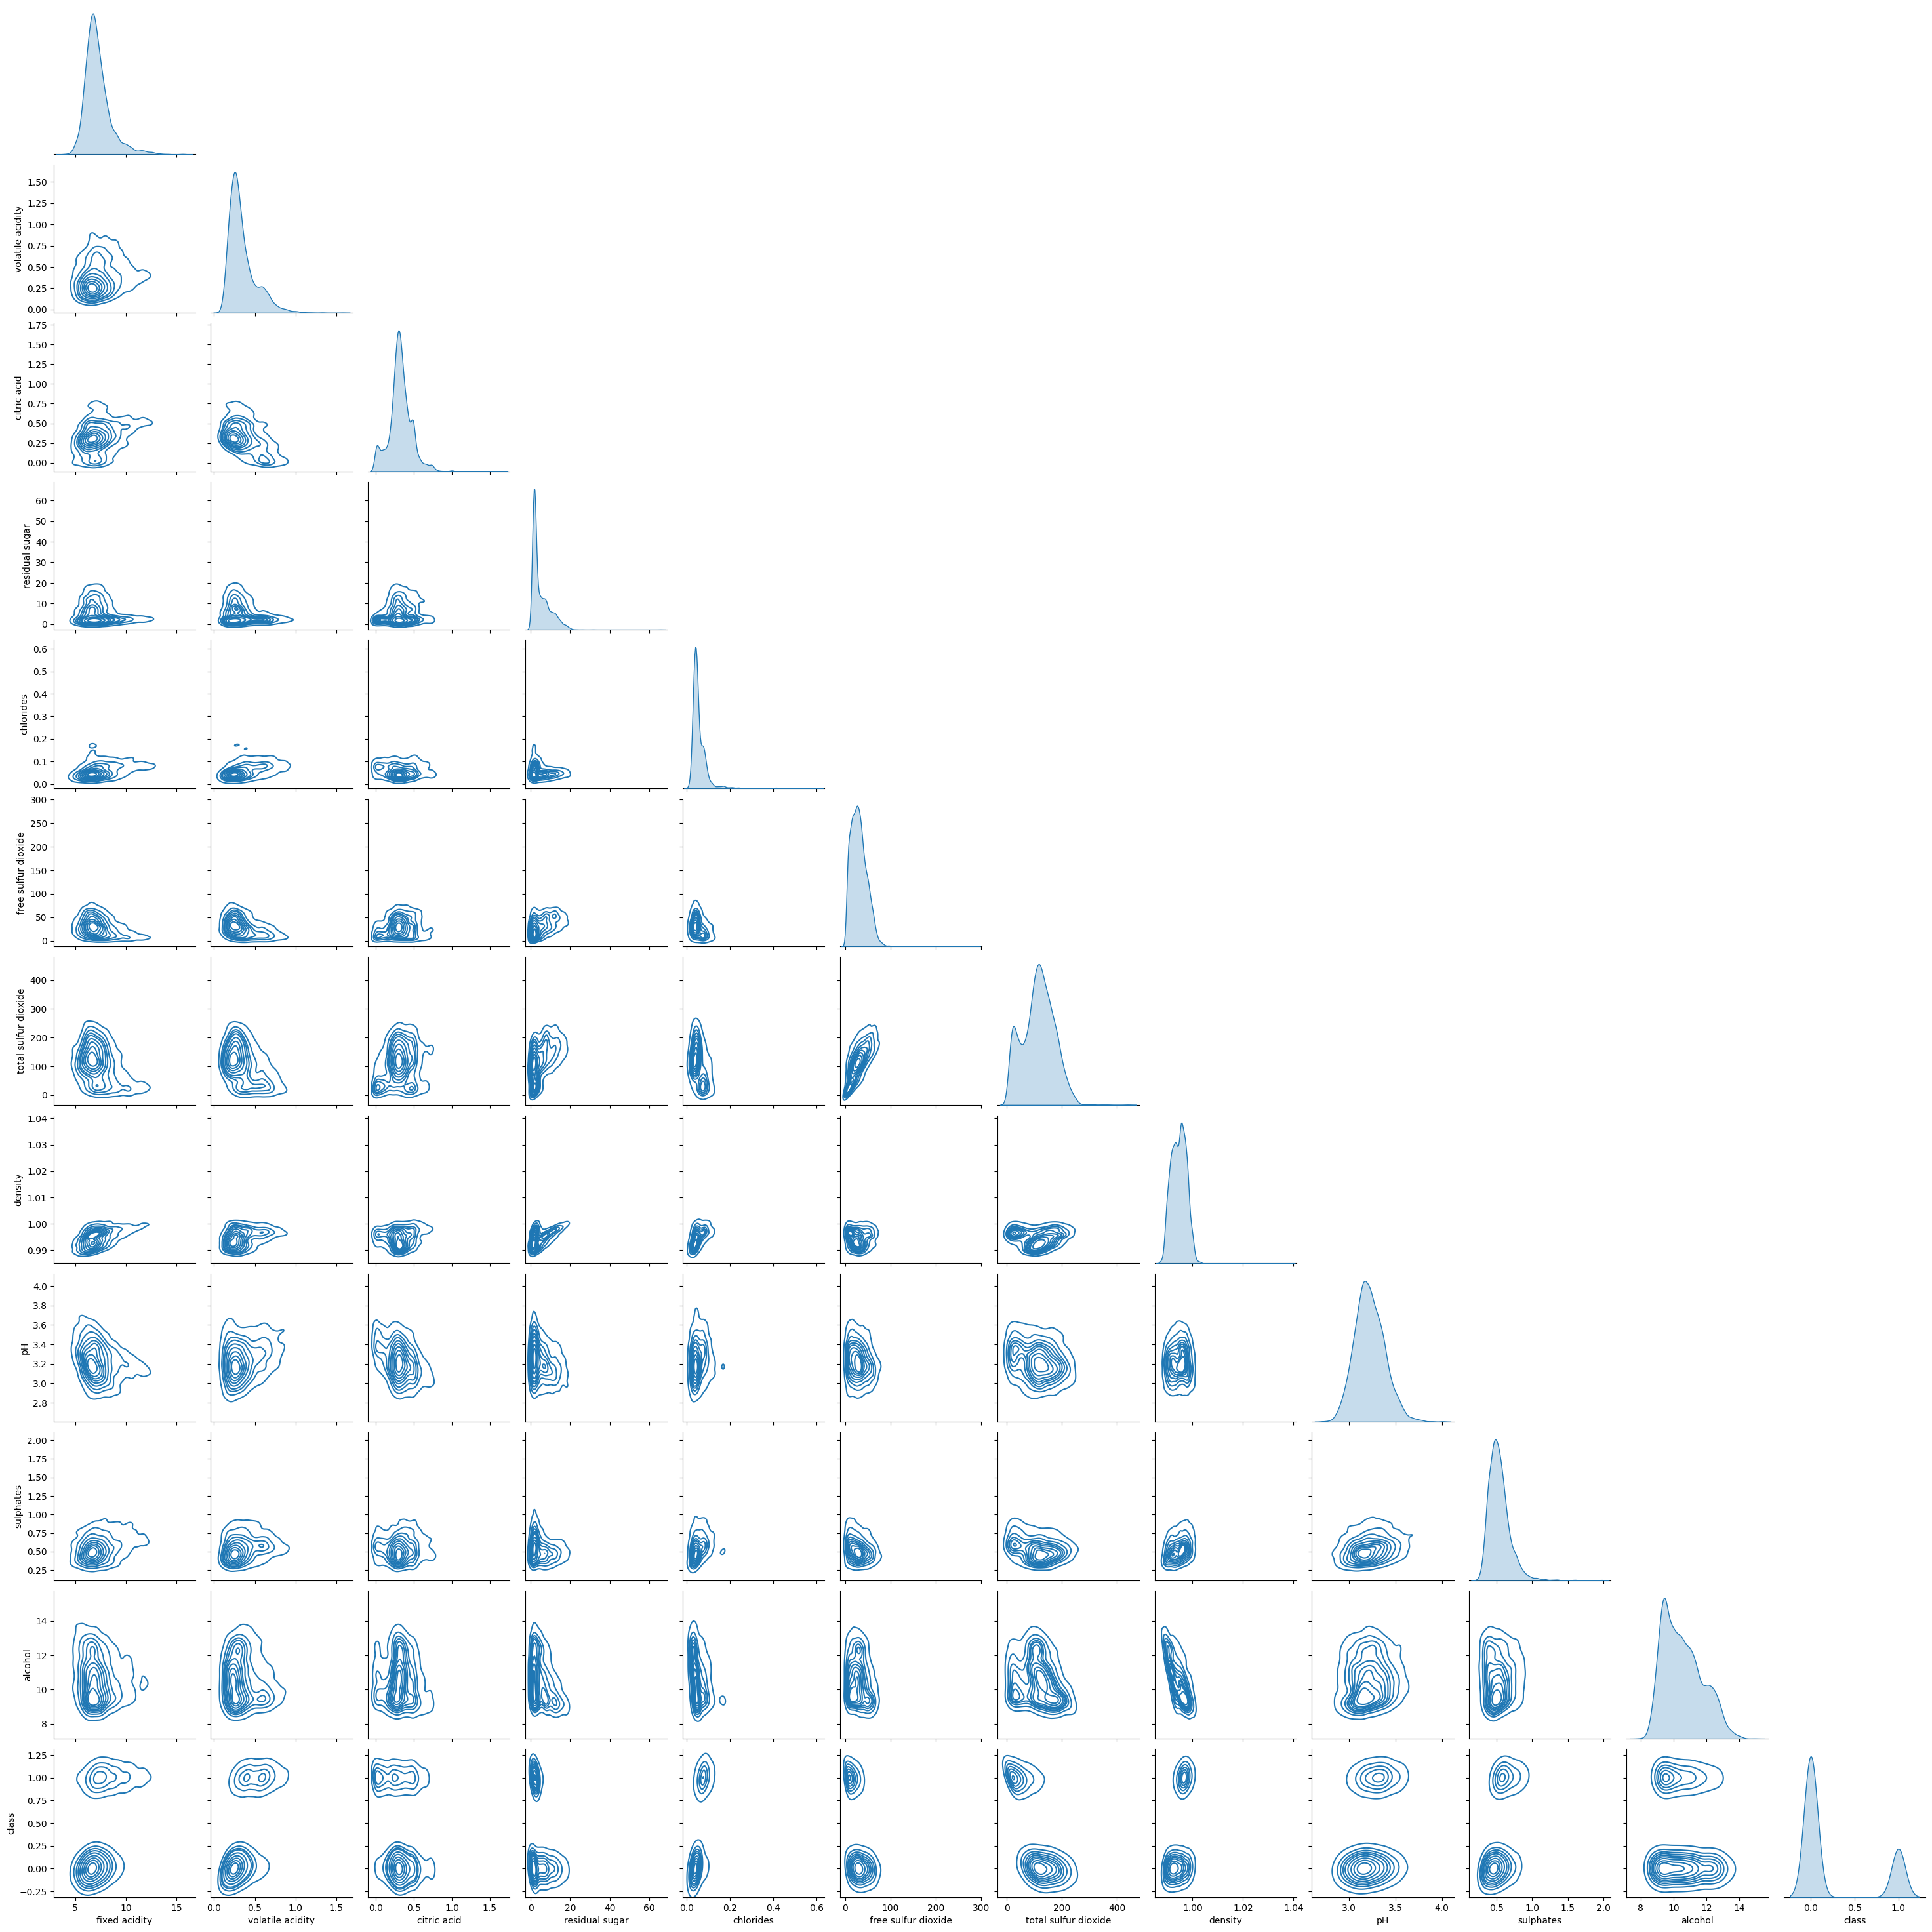

In [14]:
sns.pairplot(df[features], kind="kde",corner=True)

- pairplot indicates good data match
- correlation can be seen between density and alcohol, total sulfur dioxide and free sulfur dioxide

#### correlation matrix

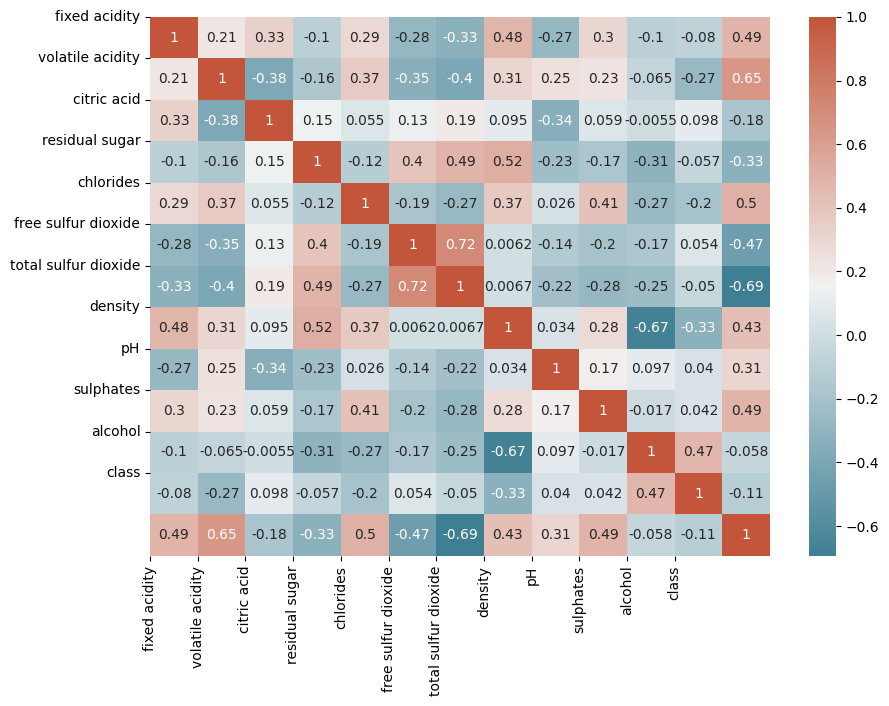

In [15]:
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

correlations = df[features].corr()

# plot correlation matrix
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
#cax = ax.matshow(correlations, vmin=-1, vmax=1)

ax = sns.heatmap(df.corr(numeric_only=True), cmap=custom_cmap,annot=True)
#fig.colorbar('')
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(features)
ax.set_yticklabels(features)
plt.show()



- negative correlation can be seen between alcohol and density
- cood correlation between density and residual sugar, sulfur dioxide and residual sugar

#### Histogram of all features

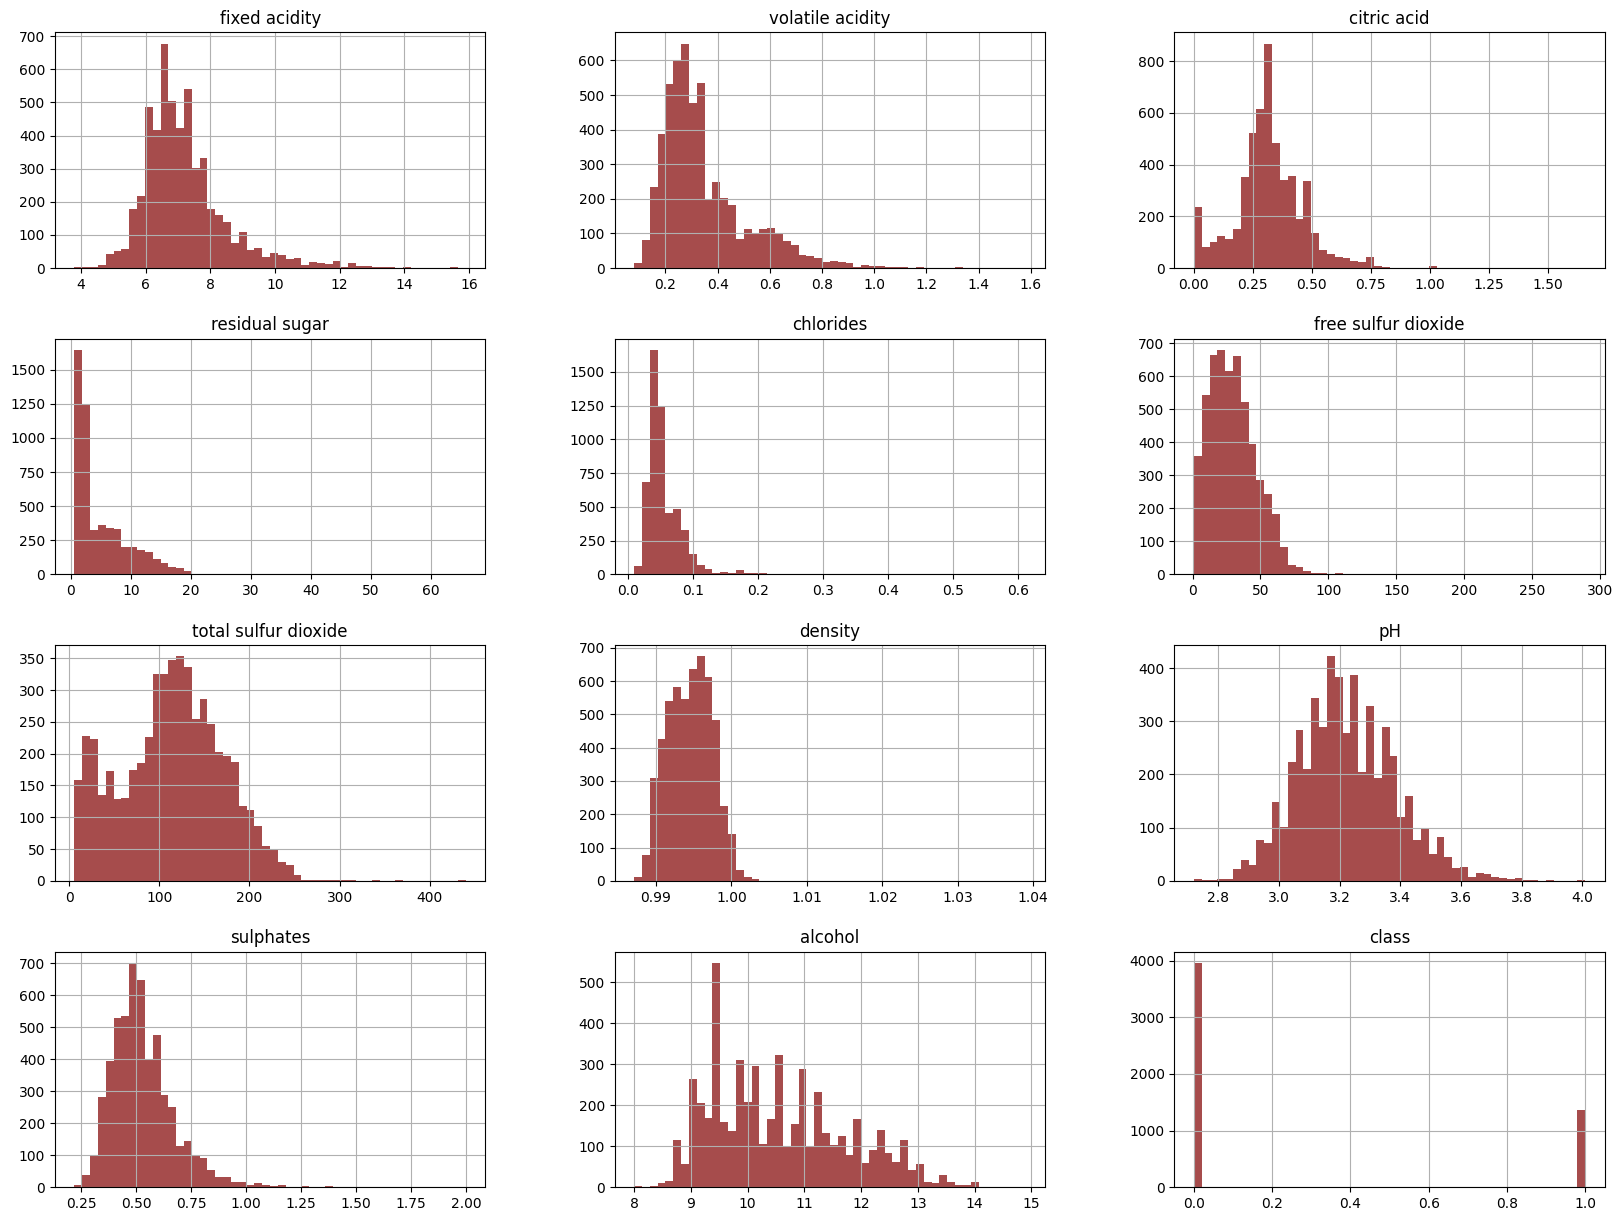

In [16]:
#histogram of all the features 
df[features].hist(bins=50, figsize=(20,15),color='maroon',alpha=0.7)
plt.show()

#### shapiro-wilk test to estimate Gaussian distribution numerically

In [17]:
from scipy.stats import shapiro

for feature in features:
    stat, p = shapiro(df[feature])
    print('Feature {}'.format(feature))
    print('stat=%.3f, p=%.3f' % (stat, p))    
    if p > 0.05:
        print('Probably feature "{}" is Normally Distributed'.format(feature))
        print('\n')
    else:
        print('Probably feature "{}" is not Normally Distributed'.format(feature))
        print('\n')

Feature fixed acidity
stat=0.887, p=0.000
Probably feature "fixed acidity" is not Normally Distributed


Feature volatile acidity
stat=0.875, p=0.000
Probably feature "volatile acidity" is not Normally Distributed


Feature citric acid
stat=0.965, p=0.000
Probably feature "citric acid" is not Normally Distributed


Feature residual sugar
stat=0.806, p=0.000
Probably feature "residual sugar" is not Normally Distributed


Feature chlorides
stat=0.610, p=0.000
Probably feature "chlorides" is not Normally Distributed


Feature free sulfur dioxide
stat=0.933, p=0.000
Probably feature "free sulfur dioxide" is not Normally Distributed


Feature total sulfur dioxide
stat=0.983, p=0.000
Probably feature "total sulfur dioxide" is not Normally Distributed


Feature density
stat=0.965, p=0.000
Probably feature "density" is not Normally Distributed


Feature pH
stat=0.991, p=0.000
Probably feature "pH" is not Normally Distributed


Feature sulphates
stat=0.898, p=0.000
Probably feature "sulphates" 

/opt/conda/lib/python3.10/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- None of the continuous features follow normal distribution

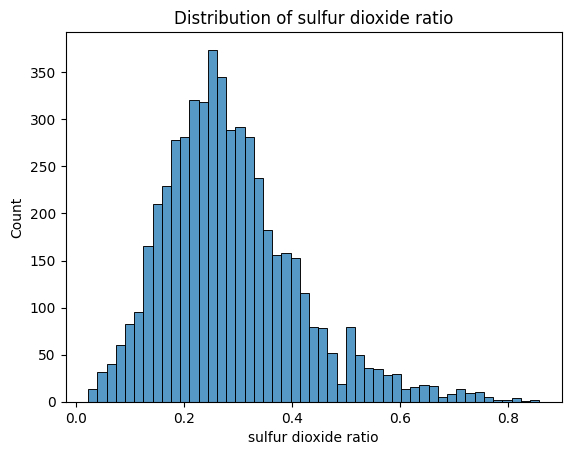

In [18]:
df["sulfur dioxide ratio"] = df["free sulfur dioxide"] / df["total sulfur dioxide"]

ax = sns.histplot(data=df, x="sulfur dioxide ratio")
ax.set_title(f"Distribution of sulfur dioxide ratio")
plt.show()

### Training/testing dataset

In [19]:
features2=['fixed acidity',
          'volatile acidity',
          'citric acid',
          'residual sugar',
          'chlorides',
          'free sulfur dioxide',
          'total sulfur dioxide',
          'density',
          'pH',
          'sulphates',
          'alcohol',
          'class',
          'sulfur dioxide ratio']
df[features2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  class                 5320 non-null   int64  
 12  sulfur dioxide ratio  5320 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 581.9 KB


## Model-1 

In [20]:
from sklearn.model_selection import train_test_split

## Normalization of the features ##################################
norm = MinMaxScaler()
X = norm.fit_transform(df[features2])
###################################################################

x_train, x_test, y_train, y_test = train_test_split(X, df['quality'], test_size=0.25, random_state=42)
print('training set: ', x_train.shape)
print('testing set: ', x_test.shape)



training set:  (3990, 13)
testing set:  (1330, 13)


In [21]:
models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        RandomForestClassifier(),
        MLPClassifier(hidden_layer_sizes = (45,30,15), solver = 'sgd', learning_rate_init = 0.1, max_iter = 500),
        AdaBoostClassifier(),
        SVC(kernel = "linear"),
        KNeighborsClassifier(n_neighbors = 3)
       ]


acc = []
eval_acc = {}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train, y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred, y_test))

eval_acc = {'Modelling Algorithm': models, 'Accuracy': acc}
#eval_acc

acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Modelling Algorithm,Accuracy
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.574436
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.564662
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.559398
2,SVC(),0.539098
0,LogisticRegression(),0.533083
9,"MLPClassifier(hidden_layer_sizes=(45, 30, 15),...",0.531579
1,LinearSVC(),0.518045
11,SVC(kernel='linear'),0.516541
3,KNeighborsClassifier(),0.511278
12,KNeighborsClassifier(n_neighbors=3),0.493233


- all models give poor fitting

## Model-2: using quality2 as target

In [22]:
from sklearn.model_selection import train_test_split

## Normalization of the features ##################################
norm = MinMaxScaler()
X = norm.fit_transform(df[features2])
###################################################################

x_train, x_test, y_train, y_test = train_test_split(X, df['quality2'], test_size=0.25, random_state=42)
print('training set: ', x_train.shape)
print('testing set: ', x_test.shape)


training set:  (3990, 13)
testing set:  (1330, 13)


In [23]:
models=[LogisticRegression(),
LinearSVC(),
SVC(kernel='rbf'),
KNeighborsClassifier(),
RandomForestClassifier(),
DecisionTreeClassifier(),
GradientBoostingClassifier(),
GaussianNB(),
RandomForestClassifier()]


acc = []
eval_acc = {}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train, y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred, y_test))

eval_acc = {'Modelling Algorithm': models, 'Accuracy': acc}


acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.748872
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.735338
8,"(DecisionTreeClassifier(max_features='sqrt', r...",0.733835
2,SVC(),0.728571
0,LogisticRegression(),0.713534
1,LinearSVC(),0.712030
3,KNeighborsClassifier(),0.700000
5,DecisionTreeClassifier(),0.633083
7,GaussianNB(),0.619549


- result was improved almost for all models
- the best performance was obtained using "GradientBoostingClassifier" and "RandomForestClassifier"

## Model-3: adding weights to balance training dataset

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

features3=['alcohol','volatile acidity','density','sulfur dioxide ratio','chlorides','total sulfur dioxide','sulphates']


## Normalization of the features ##################################
norm = MinMaxScaler()
X = norm.fit_transform(df[features2])
###################################################################


#x_train, x_test, y_train, y_test = train_test_split(df[features2], df['quality2'], test_size=0.25, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, df['quality3_num'], test_size=0.25, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(df[features3], df['quality3'], test_size=0.25, random_state=42)


print('training set: ', x_train.shape)
print('testing set: ', x_test.shape)

class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train) 
# {'high': 10.81300813, 'medium': 0.89925625,'low':0.55695142}

print('Atomatic weights: ', class_weights)
print(df['quality3'].unique())

training set:  (3990, 13)
testing set:  (1330, 13)
Atomatic weights:  [1.34888438 0.79450418]
['low', 'high']
Categories (2, object): ['low', 'high']


In [25]:
#models=[RandomForestClassifier(class_weight={'high': 10.81300813, 'medium': 0.89925625,'low':0.55695142}),
#        RandomForestClassifier(class_weight={'high': 0.8, 'medium': 0.3,'low':0.1})]

models=[RandomForestClassifier(class_weight={1: 1.34888438, 0:0.79450418}),
        RandomForestClassifier(class_weight={1: 0.85,0:0.15}),
        XGBClassifier(class_weight={1: 0.85,0:0.15}),
        SVC(kernel='rbf',class_weight={1: 0.85,0:0.15})
       ]

acc = []
eval_acc = {}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train, y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred, y_test))

eval_acc = {'Modelling Algorithm': models, 'Accuracy': acc}


acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

[20:41:44] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



,Modelling Algorithm,Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.776692
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.768421
2,"XGBClassifier(base_score=None, booster=None, c...",0.742105
3,"SVC(class_weight={0: 0.15, 1: 0.85})",0.617293


- result is improved compare result without weights
- manual weights in the most cases give better result
- accuracy woth binary target is the best so far (i.e. using "quality3")

### feature importance

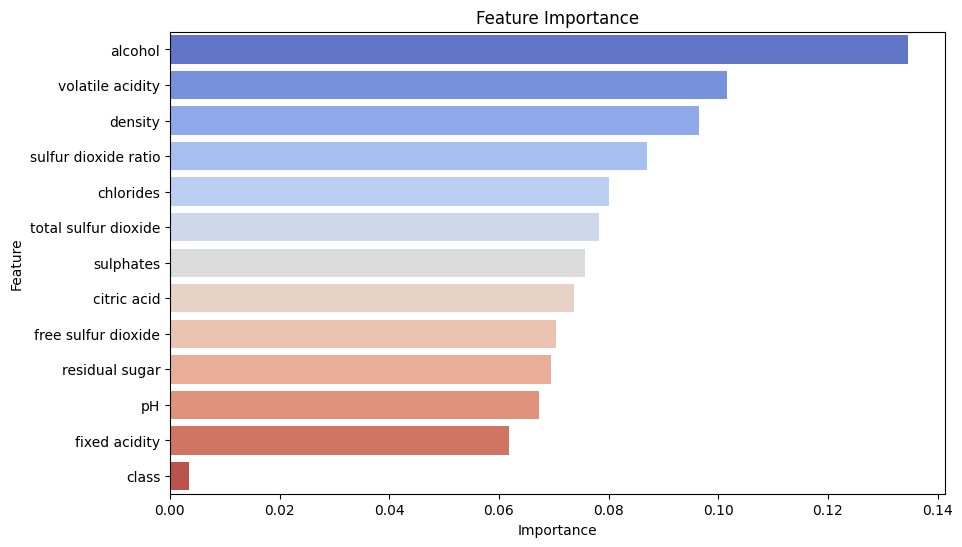

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df[features2], df['quality3'], test_size=0.25, random_state=42)

# Get feature importances
best_model=RandomForestClassifier(class_weight={'high': 1.34888438, 'low':0.79450418})
best_model.fit(x_train, y_train)
feature_importances = best_model.feature_importances_

# Create a DataFrame to visualize the importances
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

- reduction feature vector (i.e. features3) decresed accuracy

## Model-4: add PCA in analysis

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Normalization of the features ##################################
norm = MinMaxScaler()
X = norm.fit_transform(df[features2])
###################################################################

x_train, x_test, y_train, y_test = train_test_split(X, df['quality3_num'], test_size=0.25, random_state=42)
print('training set: ', x_train.shape)
print('testing set: ', x_test.shape)


pca = PCA(n_components = 8)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

print(sorted(explained_variance,reverse = True))

training set:  (3990, 13)
testing set:  (1330, 13)
[0.6597879368699098, 0.10790426674094589, 0.06274168553745543, 0.05734648905063709, 0.029132328313538926, 0.025300626868544257, 0.01484134085280829, 0.013609943326120462]


In [28]:
#models=[RandomForestClassifier(class_weight={'high': 10.81300813, 'medium': 0.89925625,'low':0.55695142}),
#        RandomForestClassifier(class_weight={'high': 0.8, 'medium': 0.3,'low':0.1})]

models=[RandomForestClassifier(class_weight={1: 1.34888438, 0:0.79450418}),
        RandomForestClassifier(class_weight={1: 0.85,0:0.15})]

acc = []
eval_acc = {}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train, y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred, y_test))

eval_acc = {'Modelling Algorithm': models, 'Accuracy': acc}


acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.746617
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.743609


- PCA decreased the accuracy

### Cross-validation

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

LE = LabelEncoder()
df['quality3_num'] = LE.fit_transform(df['quality3'])

models = [
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]


y=df['quality3_num']
X=df[features2]

scaler = StandardScaler()

# Loop through each model and evaluate using cross-validation
for name, model in models:
    X_scaled = scaler.fit_transform(X)
    
    # Calculate cross-validated accuracy
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    
    print(f'{name}: Mean Accuracy = {scores.mean():.2f}, Std Dev = {scores.std():.2f}')

SVM: Mean Accuracy = 0.68, Std Dev = 0.11
Random Forest: Mean Accuracy = 0.67, Std Dev = 0.11
Logistic Regression: Mean Accuracy = 0.68, Std Dev = 0.08
K-Nearest Neighbors: Mean Accuracy = 0.64, Std Dev = 0.10


### Training

- The best model would be selected using K-fold cross validation
- The best model would be tuned in order to improve result

### Searching for the best parameters for selected models (Hyperparameter Tuning)

In [30]:
from sklearn.model_selection import GridSearchCV



model_params = {
    "svm" : {
        "model" : SVC(gamma = "auto",class_weight={1: 0.85,0:0.15}),
        "params" :{
            'C' : [1, 10, 15, 20],
            'kernel' : ["rbf"]
         }
     },
    
     "random_forest":{
        "model": RandomForestClassifier(class_weight={1: 1.34888438, 0:0.79450418}),
        "params":{
                'bootstrap': [True],
                'max_depth': [80, 90, 100],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300]
        }
    }
    
}




In [31]:
score = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv = 10, return_train_score= False)
    clf.fit(x_train, y_train)
    score.append({
        "Model" : model_name,
        "Best_Score" : clf.best_score_,
        "Best_Params" : clf.best_params_
    })
    
dscore = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])
dscore

,Model,Best_Score,Best_Params
0,svm,0.629323,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.750627,"{'bootstrap': True, 'max_depth': 100, 'max_fea..."


## Conclusion
- input data classes were badly balanced
- converting 1-9 classes into 0-1 classes improved data balance and gave the best classification result
- the best classification result was obtained for RandomForestClassifier
- PCA did not improve result
- including class weights in the classifier improved result
- feature "alcohol" has the highest impact on the final classification result
